In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
data = pd.read_csv("insurance.csv")

# Data Exploration

In [133]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [134]:
data.shape

(1338, 7)

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [136]:
data.select_dtypes(include = 'object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [137]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [138]:
data2= data.drop(columns =['region','smoker'])
data3= data.drop(columns =['sex','smoker'])
data4= data.drop(columns =['region','sex'])

In [139]:
data2.groupby('sex').mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [140]:
data3.groupby('region').mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [141]:
data4.groupby('smoker').mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [142]:
data.isnull().values.sum()

0

# Encoding Categorical Data

In [143]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [144]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [145]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [146]:
data = pd.get_dummies(data,drop_first = True, dtype = int )

In [147]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [148]:
data.shape

(1338, 9)

# Correlation Matrix

In [149]:
data5 = data.drop(columns =['charges'])

<Axes: title={'center': 'Correlation with Charges'}>

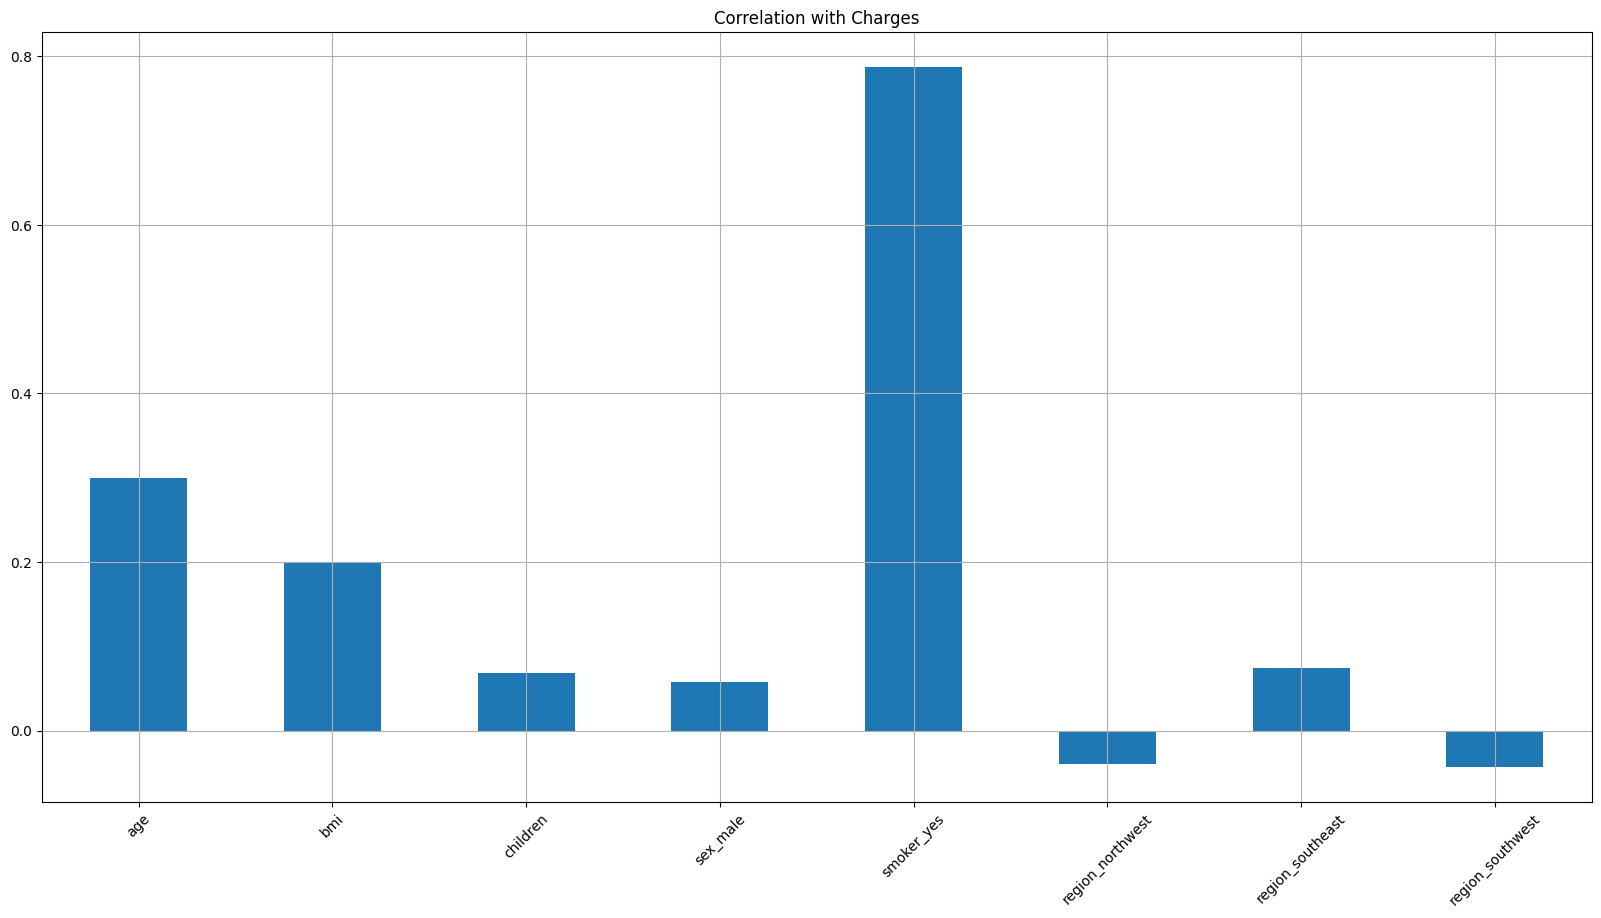

In [150]:
data5.corrwith(data['charges']).plot.bar(figsize =(20,10), rot= 45, title = "Correlation with Charges", grid = True)

In [151]:
corr = data.corr()

<Axes: >

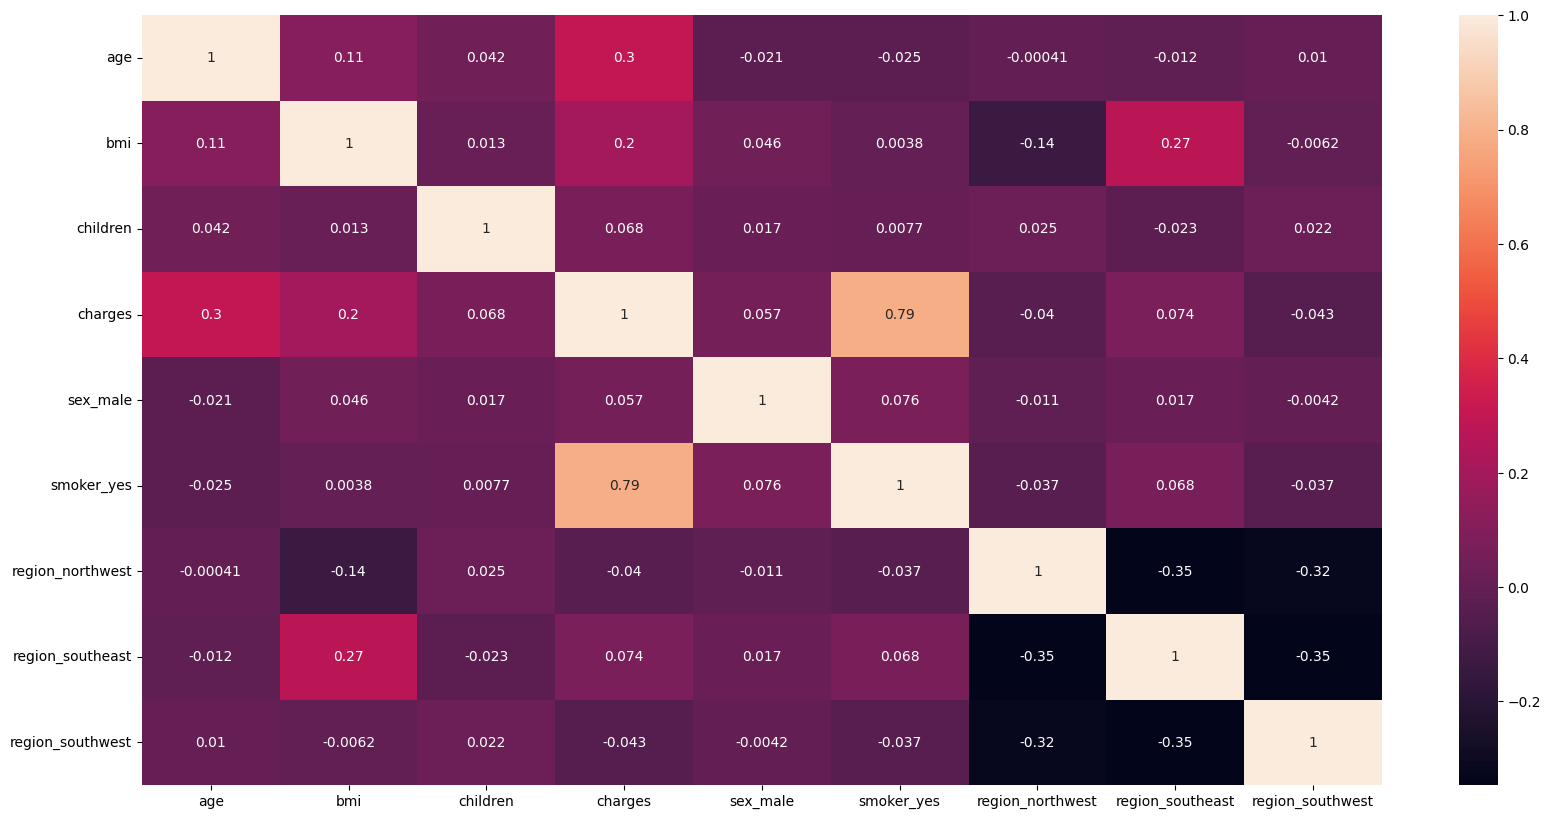

In [152]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot = True)

# Split the Dataset

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
X = data5

In [155]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [156]:
y = data['charges']

In [157]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [159]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((1070, 8), (268, 8), (1070,), (268,))

# Feature Scaling

In [160]:
from sklearn.preprocessing import StandardScaler

In [161]:
scale = StandardScaler()
X_train= scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [162]:
X_train, X_test

(array([[-0.14853305,  0.54530479,  2.41394802, ..., -0.55791981,
         -0.6155209 ,  1.70862925],
        [-1.49780784,  0.59867181, -0.89219519, ..., -0.55791981,
          1.6246402 , -0.58526447],
        [-1.14273553,  0.96092064,  0.76087642, ..., -0.55791981,
         -0.6155209 , -0.58526447],
        ...,
        [ 0.06451033, -0.91339361, -0.89219519, ..., -0.55791981,
          1.6246402 , -0.58526447],
        [-1.42679338,  0.77656186, -0.89219519, ...,  1.79237229,
         -0.6155209 , -0.58526447],
        [-0.4325909 , -1.97749955, -0.06565939, ..., -0.55791981,
         -0.6155209 ,  1.70862925]]),
 array([[ 0.91668389, -0.08539629, -0.06565939, ..., -0.55791981,
         -0.6155209 ,  1.70862925],
        [ 0.56161157, -0.21962242, -0.06565939, ..., -0.55791981,
          1.6246402 , -0.58526447],
        [ 0.63262604,  1.59081313,  0.76087642, ...,  1.79237229,
         -0.6155209 , -0.58526447],
        ...,
        [ 1.2717562 ,  1.54472343, -0.89219519, ..., -

# Building the model

### Multiple Linear Regression

In [163]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [164]:
line  =LinearRegression()
line.fit(X_train, y_train)
y_pred = line.predict(X_test)

In [165]:
r2_score(y_test, y_pred)


0.7999876970680434

### Random Forest Regressor

In [167]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [168]:
y_pred = forest.predict(X_test)

In [169]:
r2_score(y_test, y_pred)

0.8792090234979495

### XGBOOST Model

In [174]:
from xgboost import XGBRFRegressor

In [178]:
xgb = XGBRFRegressor()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

In [179]:
r2_score(y_test, y_pred)

0.9006850762859501